In [ ]:
# pip install ultralytics opencv-python easyocr numpy matplotlib pyyaml

In [63]:
import cv2
import matplotlib.pyplot as plt
import easyocr
from ultralytics import YOLO


0: 448x640 10 persons, 1 car, 1 umbrella, 416.4ms
Speed: 4.8ms preprocess, 416.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


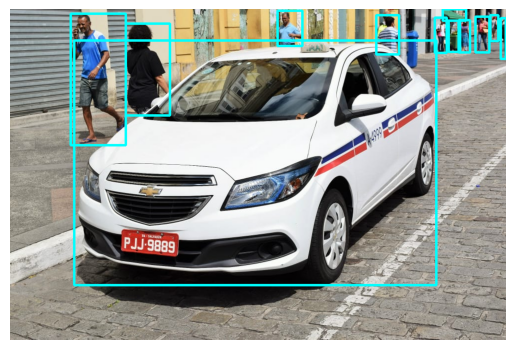

In [58]:
# Carregando o modelo YOLOv8 pré-treinado
model = YOLO('yolov8n.pt')

image_path = '/content/placas-vermelhas.jpg'
image = cv2.imread(image_path)

# Detectando objetos/pessoas na imagem
results = model(image)

# Desenhando as caixas de detecção
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 0), 3)

# Mostrar a imagem com a detecção
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Carregando do modelo pré-treinado YOLOv8
model = YOLO('yolov8n.pt')

# Treinar o modelo para identificar as placas
model.train(data='/content/dataset_placas/data.yaml', epochs=50, imgsz=640, batch=16, name='yolov8_placas')


0: 320x640 1 License_Plate, 114.3ms
Speed: 2.8ms preprocess, 114.3ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


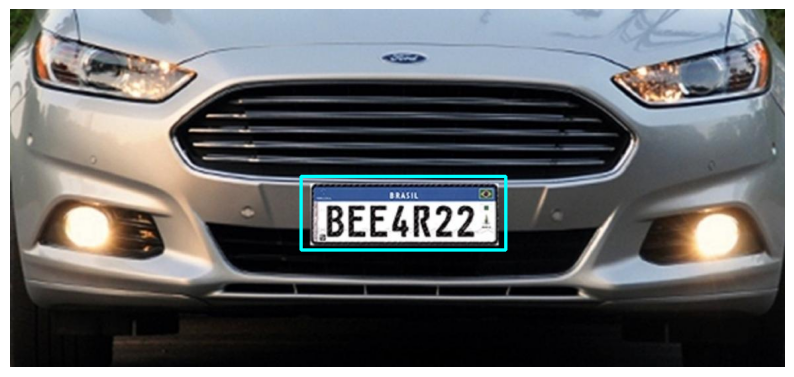

In [61]:
# Carregando o modelo treinado
model = YOLO('/content/runs/detect/yolov8_placas/weights/best.pt')

# Imagem de teste
image_path = '/content/exemplo-modelo-nova-placa-carro.jpg'

# Carregando a imagem
image = cv2.imread(image_path)
results = model(image)

# Desenhar as caixas de detecção na imagem
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 0), 3)

# Exibindo a imagem
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

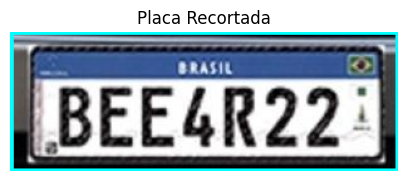

In [62]:
# Criando uma cópia da imagem
image_copy = image.copy()

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Recortando a placa
        placa_crop = image_copy[y1:y2, x1:x2]

        # Mostrando a placa recortada
        plt.figure(figsize=(5, 3))
        plt.imshow(cv2.cvtColor(placa_crop, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Placa Recortada')
        plt.show()

        # Salvando a placa recortada
        placa_crop_path = '/content/placa_detectada.jpg'
        cv2.imwrite(placa_crop_path, placa_crop)

In [45]:
# Criando o leitor do EasyOCR
reader = easyocr.Reader(['en'])

# Aplicando o OCR na placa recortada
placa_texto_easyocr = reader.readtext('/content/placa_detectada.jpg', detail=0)

# Exibindo as letras retiradas da placa
print('Placa: ', placa_texto_easyocr)

Texto da Placa (EasyOCR): ['uuil', 'BEE4R22']
